In [9]:
import numpy as np
import pandas as pd
import matplotlib.tri as tri
import matplotlib.pyplot as plt

In [11]:
# Set the random seed
np.random.seed(43)

# Number of wells
n_wells = 20

# Generate data using numpy.random
rng = np.random.default_rng(43)  # Create a numpy random number generator

well_id = rng.choice(np.arange(1, n_wells+10), size=n_wells, replace=False)
well_id.sort()
x = rng.integers(0, 5501, size=n_wells)
y = rng.integers(-2000, 6501, size=n_wells)
depth = rng.integers(-5100, -4799, size=n_wells)
h = rng.integers(11, 46, size=n_wells)
poro = np.round(rng.uniform(0.02, 0.25, size=n_wells), 3)
sw = np.round(rng.choice([rng.uniform(0.2, 0.65), 1.0], size=n_wells), 2)

# Create the data dictionary
data = {
    'well_id': well_id,
    'x': x,
    'y': y,
    'depth': depth,
    'h': h,
    'poro': poro,
    'sw': sw
}

# Convert to DataFrame for easy viewing
df = (
    pd.DataFrame(data)
    # .reset_index(drop=True)
    .reset_index()
    .rename(columns={'index': 's/no'})
    .assign(new_index=lambda x: x['s/no'] + 1)
    .set_index('s/no')
)
df


,well_id,x,y,depth,h,poro,sw,new_index
s/no,,,,,,,,
0,1,2943,906,-4975,13,0.218,1.00,1
1,5,2585,5183,-5020,17,0.094,1.00,2
2,6,2670,550,-4976,22,0.065,0.38,3
3,7,4536,3986,-5002,18,0.023,1.00,4
4,8,5199,2684,-5072,25,0.111,1.00,5
5,9,5445,3126,-4891,33,0.159,0.38,6
6,10,3263,-1570,-4924,32,0.150,1.00,7
7,12,3851,3750,-4941,41,0.222,1.00,8
8,14,5186,1833,-5078,16,0.210,1.00,9


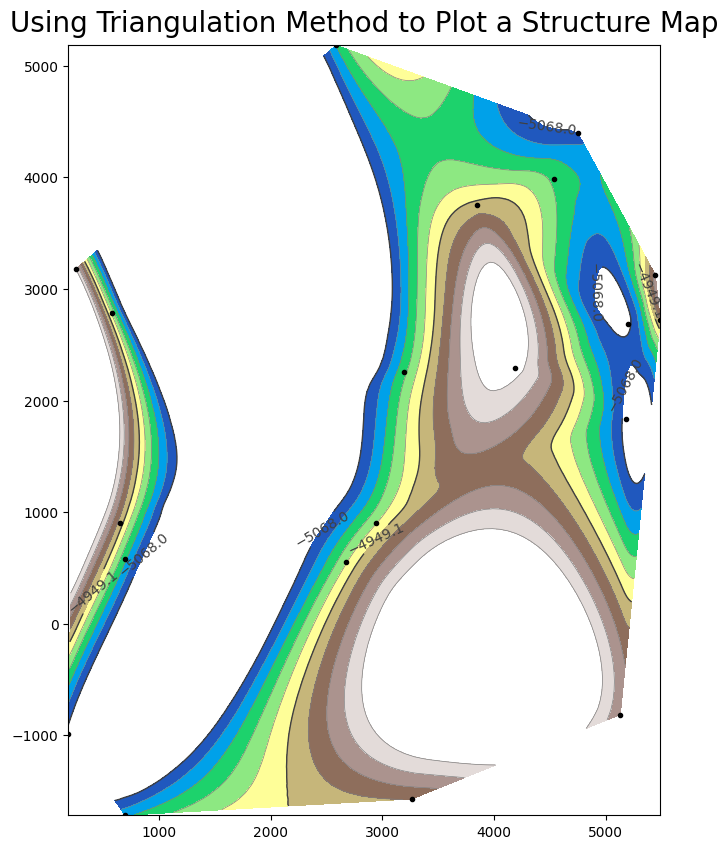

In [12]:
import numpy as np
import matplotlib.tri as tri
import matplotlib.pyplot as plt

# Extract coordinates and depth values
coordinates_x, coordinates_y, depth_values = df.x, df.y, df.depth

# Create the triangulation
triangulation = tri.Triangulation(coordinates_x, coordinates_y)
refiner = tri.UniformTriRefiner(triangulation)
refined_triangulation, refined_depth_values = refiner.refine_field(depth_values, subdiv=5)

# Create a figure and axis
plt.figure(figsize=(20, 10))
plt.gca().set_aspect('equal')
plt.triplot(triangulation, lw=0.5, color='white')

contour_levels = np.linspace(min(depth_values) + 10, max(depth_values) - 10, 10)
colormap = plt.colormaps['terrain']  # Updated colormap access

contour_filled = plt.tricontourf(refined_triangulation, refined_depth_values, levels=contour_levels, cmap=colormap)
contour_lines = plt.tricontour(refined_triangulation, refined_depth_values, levels=contour_levels,
                                colors=['0.25', '0.5', '0.5', '0.5', '0.5'],
                                linewidths=[1.0, 0.5, 0.5, 0.5, 0.5])

plt.plot(coordinates_x, coordinates_y, 'ko', ms=3)
plt.clabel(contour_lines, contour_lines.levels[::5], inline=1, fontsize=10)

plt.title("Using Triangulation Method to Plot a Structure Map", pad=10, size=20)

plt.show()